In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install pyreadr

In [3]:
import pyreadr

result = pyreadr.read_r('D:/data/weatherAUS.RData')

In [4]:
df = pd.DataFrame(result['weatherAUS'])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22,1007.7,1007.1,8,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30,1007.6,1008.7,NaN,2,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33,1010.8,1006.0,7,8,17.8,29.7,No,0.2,No


In [5]:
df.shape

(226868, 24)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RISK_MM           True
RainTomorrow      True
dtype: bool

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226868 entries, 0 to 226867
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Date           226868 non-null  object  
 1   Location       226868 non-null  object  
 2   MinTemp        223068 non-null  float64 
 3   MaxTemp        223238 non-null  float64 
 4   Rainfall       220093 non-null  float64 
 5   Evaporation    103612 non-null  float64 
 6   Sunshine       94231 non-null   float64 
 7   WindGustDir    209959 non-null  category
 8   WindGustSpeed  210068 non-null  float64 
 9   WindDir9am     209309 non-null  category
 10  WindDir3pm     217154 non-null  category
 11  WindSpeed9am   222435 non-null  float64 
 12  WindSpeed3pm   218678 non-null  float64 
 13  Humidity9am    221584 non-null  object  
 14  Humidity3pm    217333 non-null  object  
 15  Pressure9am    201792 non-null  float64 
 16  Pressure3pm    201813 non-null  float64 
 17  Cloud9am  

As we can see we have so many null values in our dataset

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

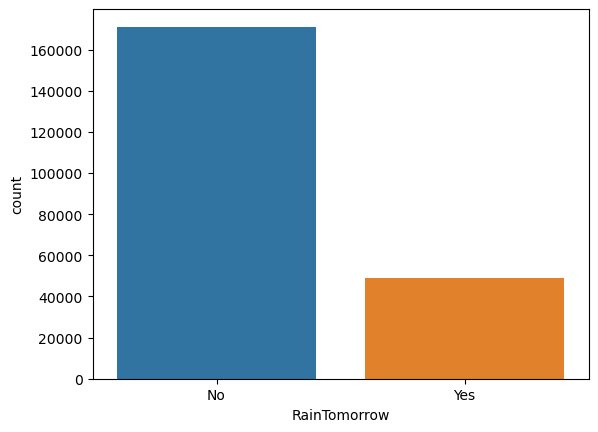

In [9]:
sns.countplot(df['RainTomorrow'])

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainToday', ylabel='count'>

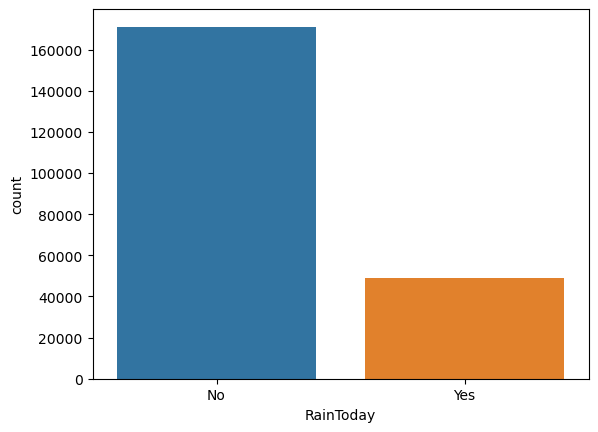

In [10]:
sns.countplot(df['RainToday'])

In [11]:
df[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine']].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine
count,223068.000000,223238.000000,220093.000000,103612.000000,94231.000000
mean,12.093779,23.214681,2.348355,5.507538,7.630908
std,6.419513,7.128250,8.542417,4.212445,3.778866
min,-8.700000,-4.100000,0.000000,0.000000,0.000000
25%,7.500000,17.900000,0.000000,2.600000,4.900000
50%,11.900000,22.600000,0.000000,4.800000,8.500000
75%,16.800000,28.200000,0.600000,7.400000,10.600000
max,33.900000,48.900000,474.000000,138.700000,14.500000


In [12]:
mean_max = df['MaxTemp'].mean()
df['MaxTemp'].fillna(mean_max, inplace = True)

mean_min = df['MinTemp'].mean()
df['MinTemp'].fillna(mean_min, inplace = True)

##for the rainfall variable we will assign 0 value assumping that there has been no rainfall##
df['Rainfall'].fillna(value=0.0, inplace=True)

In [13]:
df.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RISK_MM           True
RainTomorrow      True
dtype: bool

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

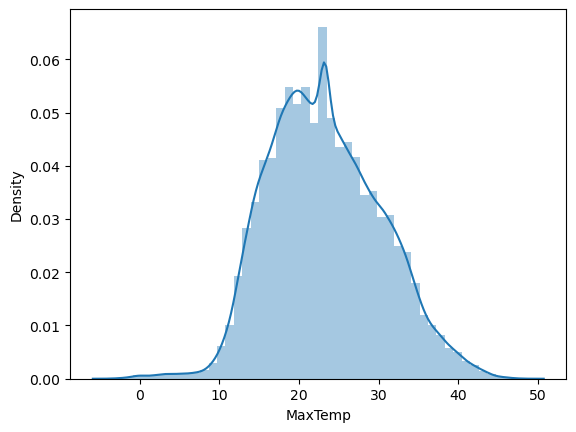

In [14]:
sns.distplot(df['MaxTemp'])

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MinTemp', ylabel='Density'>

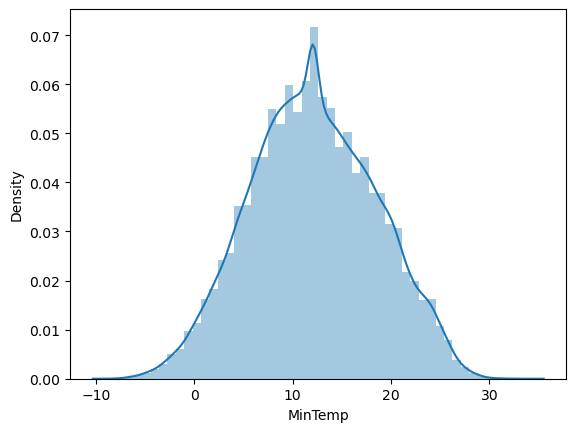

In [15]:
sns.distplot(df['MinTemp'])

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

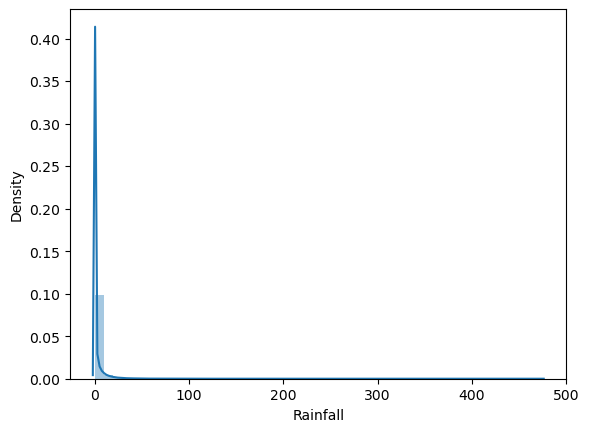

In [16]:
sns.distplot(df['Rainfall'])

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

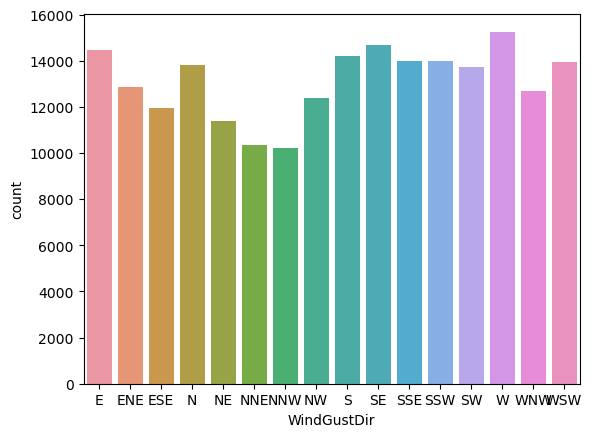

In [17]:
sns.countplot(df['WindGustDir'])

In [18]:
mean_WGS = df['WindGustSpeed'].mean()
df['WindGustSpeed'].fillna(mean_WGS, inplace = True)

mean_ws9 =df['WindSpeed9am'].mean()
df['WindSpeed9am'].fillna(mean_ws9, inplace=True)

mean_ws3 =df['WindSpeed3pm'].mean()
df['WindSpeed3pm'].fillna(mean_ws3, inplace=True)

mean_hu9 =df['Humidity9am'].mean()
df['Humidity9am'].fillna(mean_hu9, inplace=True)

mean_hu3 =df['Humidity3pm'].mean()
df['Humidity3pm'].fillna(mean_hu3, inplace=True)

mean_ps9 =df['Pressure9am'].mean()
df['Pressure9am'].fillna(mean_ps9, inplace=True)

mean_ps3 =df['Pressure3pm'].mean()
df['Pressure3pm'].fillna(mean_ps3, inplace=True)

mean_cl9 =df['Cloud9am'].mean()
df['Cloud9am'].fillna(mean_cl9, inplace=True)

mean_cl3 =df['Cloud3pm'].mean()
df['Cloud3pm'].fillna(mean_cl9, inplace=True)

mean_tp9 =df['Temp9am'].mean()
df['Temp9am'].fillna(mean_tp9, inplace=True)

mean_tp3 =df['Temp3pm'].mean()
df['Temp3pm'].fillna(mean_tp3, inplace=True)

In [19]:
df.drop_duplicates(inplace=True)
df.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed    False
WindDir9am        True
WindDir3pm        True
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday         True
RISK_MM           True
RainTomorrow      True
dtype: bool

In [20]:
m_f_v = df['RainToday'].mode()[0]

In [21]:
m_f_v

'No'

In [22]:
df['RainToday'].fillna(m_f_v, inplace=True)

In [23]:
m_f_r = df['RainTomorrow'].mode()[0]
df['RainTomorrow'].fillna(m_f_r, inplace=True)

In [24]:
df.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed    False
WindDir9am        True
WindDir3pm        True
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RISK_MM           True
RainTomorrow     False
dtype: bool

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Evaporation'>

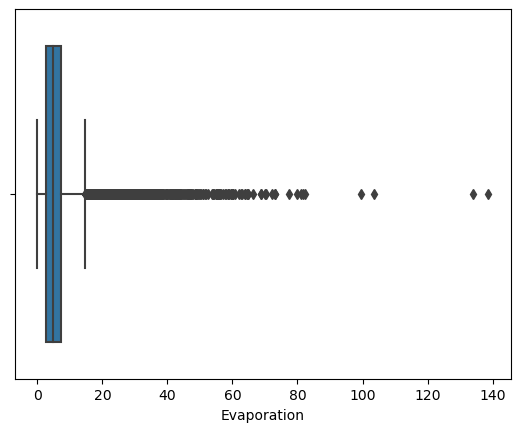

In [25]:
sns.boxplot(df['Evaporation'])

In [26]:
mean_evp = df[['Evaporation','Sunshine']].describe()
mean_evp

,Evaporation,Sunshine
count,103612.000000,94231.000000
mean,5.507538,7.630908
std,4.212445,3.778866
min,0.000000,0.000000
25%,2.600000,4.900000
50%,4.800000,8.500000
75%,7.400000,10.600000
max,138.700000,14.500000


In [27]:
mean_ep = df['Evaporation'].mean()
df['Evaporation'].fillna(mean_ep, inplace=True)

mean_si =df['Sunshine'].mean()
df['Sunshine'].fillna(mean_si, inplace=True)

m_f_w = df['WindGustDir'].mode()[0]
df['WindGustDir'].fillna(m_f_w, inplace=True)

m_f_wd9 = df['WindDir9am'].mode()[0]
df['WindDir9am'].fillna(m_f_w, inplace=True)

m_f_wd3 = df['WindDir3pm'].mode()[0]
df['WindDir3pm'].fillna(m_f_w, inplace=True)

In [28]:
risk_mm = df['RISK_MM'].describe()
risk_mm

count    220094.000000
mean          2.348583
std           8.542516
min           0.000000
25%           0.000000
50%           0.000000
75%           0.600000
max         474.000000
Name: RISK_MM, dtype: float64

In [29]:
mean_rk = df['RISK_MM'].mean()
df['RISK_MM'].fillna(mean_rk, inplace=True)

In [30]:
df.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RISK_MM          False
RainTomorrow     False
dtype: bool

In [31]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.507538,7.630908,W,44.0,W,...,22.0,1007.7,1007.1,8.000000,4.683149,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.507538,7.630908,WNW,44.0,NNW,...,25.0,1010.6,1007.8,4.683149,4.683149,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.507538,7.630908,WSW,46.0,W,...,30.0,1007.6,1008.7,4.683149,2.000000,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.507538,7.630908,NE,24.0,SE,...,16.0,1017.6,1012.8,4.683149,4.683149,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.507538,7.630908,W,41.0,ENE,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,0.2,No


In [32]:
df.shape

(226868, 24)

In [33]:
type(df)

pandas.core.frame.DataFrame

In [34]:
df = df.drop(['Date', 'Location'], axis=1)

In [35]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,13.4,22.9,0.6,5.507538,7.630908,W,44.0,W,WNW,20.0,...,22.0,1007.7,1007.1,8.000000,4.683149,16.9,21.8,No,0.0,No
1,7.4,25.1,0.0,5.507538,7.630908,WNW,44.0,NNW,WSW,4.0,...,25.0,1010.6,1007.8,4.683149,4.683149,17.2,24.3,No,0.0,No
2,12.9,25.7,0.0,5.507538,7.630908,WSW,46.0,W,WSW,19.0,...,30.0,1007.6,1008.7,4.683149,2.000000,21.0,23.2,No,0.0,No
3,9.2,28.0,0.0,5.507538,7.630908,NE,24.0,SE,E,11.0,...,16.0,1017.6,1012.8,4.683149,4.683149,18.1,26.5,No,1.0,No
4,17.5,32.3,1.0,5.507538,7.630908,W,41.0,ENE,NW,7.0,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,0.2,No


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226868 entries, 0 to 226867
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   MinTemp        226868 non-null  float64 
 1   MaxTemp        226868 non-null  float64 
 2   Rainfall       226868 non-null  float64 
 3   Evaporation    226868 non-null  float64 
 4   Sunshine       226868 non-null  float64 
 5   WindGustDir    226868 non-null  category
 6   WindGustSpeed  226868 non-null  float64 
 7   WindDir9am     226868 non-null  category
 8   WindDir3pm     226868 non-null  category
 9   WindSpeed9am   226868 non-null  float64 
 10  WindSpeed3pm   226868 non-null  float64 
 11  Humidity9am    226868 non-null  float64 
 12  Humidity3pm    226868 non-null  float64 
 13  Pressure9am    226868 non-null  float64 
 14  Pressure3pm    226868 non-null  float64 
 15  Cloud9am       226868 non-null  float64 
 16  Cloud3pm       226868 non-null  float64 
 17  Temp9am   

In [37]:
df=pd.get_dummies(data=df, columns=['WindGustDir','WindDir9am','WindDir3pm','RainToday',])

In [38]:
df.replace(['No','Yes'],[0,1], inplace=True)

In [39]:
df=df.astype(float)

In [40]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
count,226868.000000,226868.000000,226868.000000,226868.000000,226868.000000,226868.000000,226868.000000,226868.000000,226868.000000,226868.000000,...,226868.000000,226868.000000,226868.000000,226868.000000,226868.000000,226868.000000,226868.000000,226868.000000,226868.000000,226868.000000
mean,12.093779,23.214681,2.278225,5.507538,7.630908,40.058005,14.063960,18.589584,68.939030,51.415096,...,0.066391,0.072315,0.062499,0.057183,0.062089,0.110924,0.060581,0.064875,0.784372,0.215628
std,6.365523,7.070992,8.423387,2.846764,2.435401,13.006794,8.780651,8.554661,19.224684,20.623182,...,0.248965,0.259010,0.242060,0.232193,0.241318,0.314038,0.238562,0.246305,0.411258,0.411258
min,-8.700000,-4.100000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,18.000000,0.000000,5.200000,7.630908,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,12.093779,22.800000,0.000000,5.507538,7.630908,39.000000,13.000000,18.589584,69.000000,51.415096,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,16.700000,28.100000,0.600000,5.507538,7.630908,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,33.900000,48.900000,474.000000,138.700000,14.500000,146.000000,87.000000,87.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
MinTemp,1.000000,0.731899,0.103877,0.305066,0.049972,0.168713,0.174905,0.168958,-0.235921,0.002080,...,-0.005180,0.073494,0.024892,-0.030347,-0.048596,-0.077501,-0.047517,-0.061245,-0.052774,0.052774
MaxTemp,0.731899,1.000000,-0.070697,0.379839,0.297016,0.062459,0.014773,0.046267,-0.507497,-0.505963,...,-0.054479,0.037309,-0.011827,-0.056351,-0.054152,-0.096382,-0.026807,-0.061904,0.226453,-0.226453
Rainfall,0.103877,-0.070697,1.000000,-0.032067,-0.152088,0.120992,0.080212,0.052185,0.218996,0.250042,...,0.024592,0.006692,0.015124,0.023708,0.007628,0.010879,0.007316,0.007616,-0.499632,0.499632
Evaporation,0.305066,0.379839,-0.032067,1.000000,0.270489,0.130215,0.117052,0.085679,-0.318300,-0.243398,...,-0.010422,0.021780,0.009469,-0.008831,0.001081,-0.011947,-0.017299,-0.007052,0.119599,-0.119599
Sunshine,0.049972,0.297016,-0.152088,0.270489,1.000000,-0.025332,-0.001826,0.033967,-0.305258,-0.391340,...,-0.029852,0.014752,-0.010705,-0.016880,0.021775,-0.017978,-0.010353,0.006170,0.213965,-0.213965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WindDir3pm_W,-0.077501,-0.096382,0.010879,-0.011947,-0.017978,0.051993,-0.009192,0.001880,0.049935,0.012100,...,-0.094192,-0.098618,-0.091200,-0.086989,-0.090880,1.000000,-0.089698,-0.093035,-0.044121,0.044121
WindDir3pm_WNW,-0.047517,-0.026807,0.007316,-0.017299,-0.010353,0.091809,0.015429,0.056808,-0.006935,-0.036736,...,-0.067719,-0.070901,-0.065568,-0.062540,-0.065338,-0.089698,1.000000,-0.066887,-0.026930,0.026930
WindDir3pm_WSW,-0.061245,-0.061904,0.007616,-0.007052,0.006170,0.045651,0.011217,0.037857,-0.005072,-0.012808,...,-0.070238,-0.073539,-0.068007,-0.064867,-0.067769,-0.093035,-0.066887,1.000000,-0.044011,0.044011
RainToday_No,-0.052774,0.226453,-0.499632,0.119599,0.213965,-0.142142,-0.094051,-0.073323,-0.347784,-0.371687,...,-0.030145,0.002797,-0.011495,-0.043836,-0.036316,-0.044121,-0.026930,-0.044011,1.000000,-1.000000


                                          Multiple Linear Regression

In [42]:
import statsmodels.api as sn 
from sklearn.linear_model import LinearRegression

In [43]:
X = df.drop('RainTomorrow',axis=1)
Y = df['RainTomorrow']

In [44]:
X_c = sn.add_constant(X)
X_c.head()

,const,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,1.0,13.4,22.9,0.6,5.507538,7.630908,44.0,20.0,24.0,71.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,7.4,25.1,0.0,5.507538,7.630908,44.0,4.0,22.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,12.9,25.7,0.0,5.507538,7.630908,46.0,19.0,26.0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,9.2,28.0,0.0,5.507538,7.630908,24.0,11.0,9.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,17.5,32.3,1.0,5.507538,7.630908,41.0,7.0,20.0,82.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
lm = sn.OLS(Y,X).fit()

In [46]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           RainTomorrow   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     2435.
Date:                Fri, 09 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:43:17   Log-Likelihood:                -61735.
No. Observations:              226868   AIC:                         1.236e+05
Df Residuals:                  226804   BIC:                         1.243e+05
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
MinTemp             0.0002      0.000      0.717      0.474      -0.000       0.001
MaxTemp            -0.0013      0.000     -2.738      0.006      -0.002      -0.000
Rainfall           -0.0012   9.49e-05    -13.139      0.000      -0.001      -0.001
Evaporation         0.0010      0.000      3.676      0.000       0.000       0.001
Sunshine           -0.0120      0.000    -33.464      0.000      -0.013      -0.011
WindGustSpeed       0.0053   8.18e-05     64.804      0.000       0.005       0.005
WindSpeed9am       -0.0006      0.000     -5.906      0.000      -0.001      -0.000
WindSpeed3pm       -0.0032      0.000    -28.705      0.000      -0.003      -0.003
Humidity9am        -0.0008   6.69e-05    -11.899      0.000      -0.001      -0.001
Humidity3pm         0.0062   7.61e-05     81.711      0.000       0.006       0.006
Pressure9am         0.0068      0.000     14.944      0.000       0.006       0.008
Pressure3pm        -0.0127      0.000    -27.724      0.000      -0.014      -0.012
Cloud9am           -0.0005      0.000     -1.324      0.186      -0.001       0.000
Cloud3pm            0.0093      0.000     21.939      0.000       0.009       0.010
Temp9am            -0.0030      0.000     -6.659      0.000      -0.004      -0.002
Temp3pm             0.0033      0.000      6.851      0.000       0.002       0.004
RISK_MM             0.0164   8.88e-05    185.117      0.000       0.016       0.017
WindGustDir_E       0.5251      0.013     41.103      0.000       0.500       0.550
WindGustDir_ENE     0.5215      0.013     40.862      0.000       0.496       0.547
WindGustDir_ESE     0.5340      0.013     41.746      0.000       0.509       0.559
WindGustDir_N       0.5233      0.013     41.267      0.000       0.498       0.548
WindGustDir_NE      0.5124      0.013     39.977      0.000       0.487       0.538
WindGustDir_NNE     0.5122      0.013     39.937      0.000       0.487       0.537
WindGustDir_NNW     0.5320      0.013     41.991      0.000       0.507       0.557
WindGustDir_NW      0.5216      0.013     41.510      0.000       0.497       0.546
WindGustDir_S       0.5301      0.013     41.614      0.000       0.505       0.555
WindGustDir_SE      0.5391      0.013     42.233      0.000       0.514       0.564
WindGustDir_SSE     0.5339      0.013     41.851      0.000       0.509       0.559
WindGustDir_SSW     0.5307      0.013     41.867      0.000       0.506       0.556
WindGustDir_SW      0.5373      0.013     42.611      0.000       0.513       0.562
WindGustDir_W       0.5185      0.012     41.532      0.000       0.494       0.543
WindGustDir_WNW     0.5236      0.013     41.789      0.000       0.499       0.548
WindGustDir_WSW     0.5316      0.013     42.315      0.000       0.507       0.556
WindDir9am_E        0.5293      0.013     41.814      0.000

                                           MODEL EVALUATION

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state= 0)

In [49]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(181494, 67) (45374, 67) (181494,) (45374,)


In [50]:
lm_a = LinearRegression()

In [51]:
lm_a.fit(X,Y)

LinearRegression()

In [52]:
Y_train_a = lm_a.predict(X_train)
Y_test_a = lm_a.predict(X_test)

In [53]:
from sklearn.metrics import r2_score

In [54]:
r2_score(Y_train,Y_train_a)

0.4050746223037254

In [55]:
r2_score(Y_test,Y_test_a)

0.397288598839568

Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
x = df.loc[:,df.columns !='RainTomorrow']
y = df['RainTomorrow']

In [58]:
clf_lr = LogisticRegression()
clf_lr.fit(x,y)

C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
clf_lr.coef_

array([[ 3.12392208e-02, -3.28162990e-02,  2.96597238e-02,
        -4.88868443e-02, -2.06955813e-01,  1.01755684e-02,
        -2.09802390e-02,  3.66054543e-02, -1.05401667e-03,
         1.46242081e-02,  3.96161158e-02, -4.56224378e-02,
         1.04906935e-01,  1.96187024e-01,  7.84347301e-03,
        -1.37958668e-03,  2.47874973e+00, -7.36030636e-03,
        -3.19152014e-03, -5.83935611e-03,  1.04916996e-02,
        -3.53411604e-03,  1.04062124e-03,  1.19553201e-02,
         1.05216935e-02, -7.95139714e-03, -5.92398309e-03,
        -7.46910131e-03, -4.87044224e-03,  2.17740645e-03,
        -7.59894160e-04,  8.33657343e-03,  3.12983043e-03,
        -5.84036956e-03,  1.93762322e-03, -7.54493159e-03,
         1.79602466e-02,  4.17042395e-03,  1.13538706e-02,
         9.58330250e-03,  5.94218073e-03, -9.18810415e-03,
        -9.73635516e-03, -8.38278337e-03, -6.46863547e-03,
         1.04674578e-04, -5.36154144e-03,  2.37595986e-03,
        -1.52533153e-04, -7.59724277e-03, -5.71418815e-0

In [60]:
clf_lr.intercept_


array([0.00075304])

In [61]:
X_cons = sn.add_constant(X)

In [62]:
from statsmodels.discrete.discrete_model import Logit
logit = Logit(y, X_cons).fit()

Optimization terminated successfully.
         Current function value: 0.094731
         Iterations 17


In [63]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:               226868
Model:                          Logit   Df Residuals:                   226804
Method:                           MLE   Df Model:                           63
Date:                Fri, 09 Jun 2023   Pseudo R-squ.:                  0.8183
Time:                        14:43:49   Log-Likelihood:                -21491.
converged:                       True   LL-Null:                   -1.1828e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -12.1769        nan        nan        nan         nan         nan
MinTemp             0.0336      0.007      5.082      0.000       0.021       0.047
MaxTemp            -0.0116      0.008     -1.458      0.145      -0.027       0.004
Rainfall           -0.0028      0.002     -1.584      0.113      -0.006       0.001
Evaporation        -0.0175      0.006     -3.095      0.002      -0.029      -0.006
Sunshine           -0.0770      0.006    -11.865      0.000      -0.090      -0.064
WindGustSpeed       0.0151      0.002     10.000      0.000       0.012       0.018
WindSpeed9am       -0.0224      0.002    -11.124      0.000      -0.026      -0.018
WindSpeed3pm        0.0185      0.002      8.901      0.000       0.014       0.023
Humidity9am        -0.0023      0.001     -1.699      0.089      -0.005       0.000
Humidity3pm         0.0228      0.001     15.823      0.000       0.020       0.026
Pressure9am        -0.0874      0.008    -11.066      0.000      -0.103      -0.072
Pressure3pm         0.1014      0.008     12.847      0.000       0.086       0.117
Cloud9am            0.0016      0.008      0.189      0.850      -0.015       0.018
Cloud3pm            0.1258      0.009     14.030      0.000       0.108       0.143
Temp9am            -0.0105      0.009     -1.145      0.252      -0.028       0.007
Temp3pm             0.0133      0.009      1.458      0.145      -0.005       0.031
RISK_MM             2.5664      0.016    159.493      0.000       2.535       2.598
WindGustDir_E      -1.0535   1.16e+06  -9.04e-07      1.000   -2.28e+06    2.28e+06
WindGustDir_ENE    -0.8755   1.16e+06  -7.55e-07      1.000   -2.27e+06    2.27e+06
WindGustDir_ESE    -1.1043   1.17e+06  -9.46e-07      1.000   -2.29e+06    2.29e+06
WindGustDir_N      -0.6781   1.15e+06  -5.88e-07      1.000   -2.26e+06    2.26e+06
WindGustDir_NE     -0.6342   1.16e+06  -5.47e-07      1.000   -2.27e+06    2.27e+06
WindGustDir_NNE    -0.6958   1.16e+06  -6.01e-07      1.000   -2.27e+06    2.27e+06
WindGustDir_NNW    -0.3515   1.17e+06  -3.01e-07      1.000   -2.29e+06    2.29e+06
WindGustDir_NW     -0.6971   1.16e+06  -6.03e-07      1.000   -2.27e+06    2.27e+06
WindGustDir_S      -0.6148   1.16e+06   -5.3e-07      1.000   -2.28e+06    2.28e+06
WindGustDir_SE     -0.7725   1.16e+06  -6.66e-07      1.000   -2.27e+06    2.27e+06
WindGustDir_SSE    -0.7453   1.16e+06  -6.43e-07      1.000   -2.27e+06    2.27e+06
WindGustDir_SSW    -0.4717   1.16e+06  -4.08e-07      1.000   -2.27e+06    2.27e+06
WindGustDir_SW     -0.5975   1.17e+06  -5.13e-07      1.000   -2.28e+06    2.28e+06
WindGustDir_W      -1.4973   1.15e+06   -1.3e-06      1.000   -2.26e+06    2.26e+06
WindGustDir_WNW    -0.6704   1.16e+06  -5.77e-07      1.000   -2.28e+06    2.28e+06
WindGustDir_WSW    -0.7172   1.17e+06  -6.15e-07      1.000   -2.29e+06    2.29e+06
WindDir9am_E       -0.7771        nan        nan        nan         nan         nan
WindDir9am_ENE     -0.4706        nan        nan 

In [64]:
clf_lr.predict_proba(x)

array([[0.99462738, 0.00537262],
       [0.99555946, 0.00444054],
       [0.99753729, 0.00246271],
       ...,
       [0.99813581, 0.00186419],
       [0.99890883, 0.00109117],
       [0.99784998, 0.00215002]])

In [65]:
y_pred = clf_lr.predict(x)

In [66]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [67]:
y_pred_03 = (clf_lr.predict_proba(x)[:,1]>=0.3)

In [68]:
y_pred_03

array([False, False, False, ..., False, False, False])

In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)

array([[171956,   5983],
       [  6681,  42248]], dtype=int64)

In [70]:
cm=confusion_matrix(y,y_pred_03)
cm

array([[170538,   7401],
       [  4082,  44847]], dtype=int64)

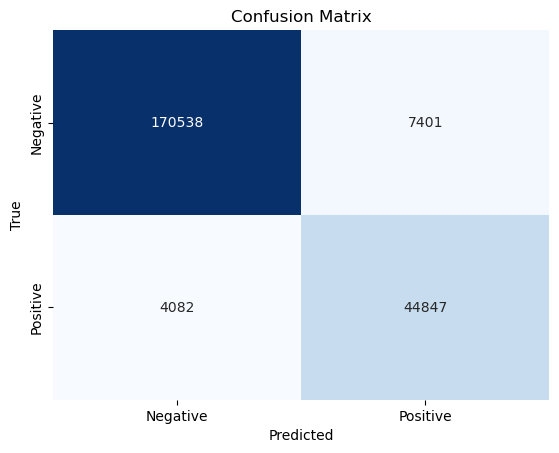

In [71]:
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
tick_labels = ['Negative', 'Positive']
ax.set_xticklabels(tick_labels)
ax.set_yticklabels(tick_labels)
plt.show()

In [72]:
from sklearn.metrics import precision_score, recall_score

In [73]:
precision_score(y,y_pred)

0.8759511517488752

In [74]:
recall_score(y,y_pred)

0.8634552106112939

In [75]:
from sklearn.metrics import roc_auc_score

In [76]:
roc_auc_score(y,y_pred)

0.9149156641347962

                                         Linear Discriminant analysis(LDA)

In [77]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [78]:
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(x, y)

LinearDiscriminantAnalysis()

In [79]:
y_pred_lda = clf_lda.predict(x)

In [80]:
y_pred_lda

array([0., 0., 0., ..., 0., 0., 0.])

In [81]:
cla = confusion_matrix(y, y_pred_lda)
cla

array([[174224,   3715],
       [ 23628,  25301]], dtype=int64)

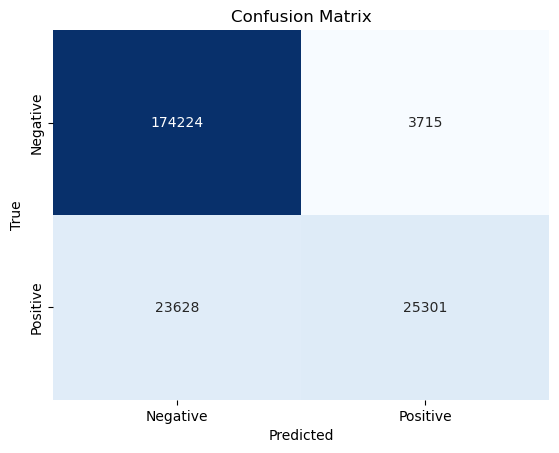

In [82]:
fig, ax = plt.subplots()
sns.heatmap(cla, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
tick_labels = ['Negative', 'Positive']
ax.set_xticklabels(tick_labels)
ax.set_yticklabels(tick_labels)
plt.show()

In [83]:
precision_score(y,y_pred_lda)

0.8719671905155776

                                             K-Nearest Neighbours

In [84]:
X_multi = df.drop("RainTomorrow",axis =1)
Y_multi = df['RainTomorrow']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, Y_multi, test_size = 0.2, random_state= 0)

In [86]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(181494, 67) (45374, 67) (181494,) (45374,)


In [87]:
from sklearn import preprocessing 
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)

In [88]:
scaler = preprocessing.StandardScaler().fit(X_test)
X_test_s = scaler.transform(X_test)

In [89]:
X_test_s

array([[ 1.2057934 ,  1.9584654 ,  0.27071615, ..., -0.26125067,
        -1.91799287,  1.91799287],
       [-0.23918561,  0.33393255, -0.2654699 , ...,  3.82774137,
         0.52137837, -0.52137837],
       [ 0.49901019,  0.91311382, -0.2654699 , ..., -0.26125067,
         0.52137837, -0.52137837],
       ...,
       [ 0.57754166,  0.51757539, -0.2654699 , ..., -0.26125067,
         0.52137837, -0.52137837],
       [-2.18676603, -1.14933658, -0.2654699 , ..., -0.26125067,
         0.52137837, -0.52137837],
       [-1.10303177, -0.47127069, -0.2654699 , ..., -0.26125067,
         0.52137837, -0.52137837]])

The Precision score of both Logistic regression and LDA are high which means that the model is capable of making accurate positive predictions. The higher the precision score, the lower the number of false positive prediction.